# Weight Initialization


### Load dependencies

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
random.seed(69)
font = {'family' : 'DejaVu Sans',
        'weight'  : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_normal, glorot_uniform

### Set Number of neurons
- Mnist inspired example


In [9]:
n_input = 28*28 # 784
n_dense = 128*2 # 256

### Selecting a bias ($b$) initializer


In [10]:
b_init = Zeros()

### Selecting a weight ($w$) initializer
- Shouldn't be the same as the bias initialization, such that each neuron treats a given input $x$ uniquely

In [11]:
w_init_list = [RandomNormal(stddev=1.0),glorot_normal(),glorot_uniform()]
# w_init = RandomNormal(stddev=1.0) # Normal Distribution σ = 1
# w_init = glorot_normal()
# w_init = glorot_uniform()

### Designing a neural network architecture

In [12]:
model_activations = ['sigmoid','relu','tanh']
weight_init_names = [r'Random Normal $\sigma = 1$', 'Glorot Normal', 'Glorot Uniform']

def test_all(x):
    fig, axs = plt.subplots(3, 3,figsize=(34,34))
    for c1,j in enumerate(model_activations):
        for c,i in enumerate(w_init_list):
            model = Sequential()

            model.add(Dense(n_dense, input_dim=n_input, kernel_initializer=w_init_list[c], bias_initializer=b_init))
            model.add(Activation(model_activations[c1]))
            # model.summary()

    # Forward propagation through network
            a_i = model.predict(x)
            axs[c1, c].hist(np.transpose(a_i))
            axs[c1, c].set_title(f'model_activation: {model_activations[c1]}\n weight init: {weight_init_names[c]}')
    for ax in axs.flat:
        ax.set(xlabel=r'$a$ activation', ylabel='count')
    plt.savefig('Weight-configurations.png')
    plt.show()


### Generating random values

In [13]:
x = np.random.random((1,n_input))

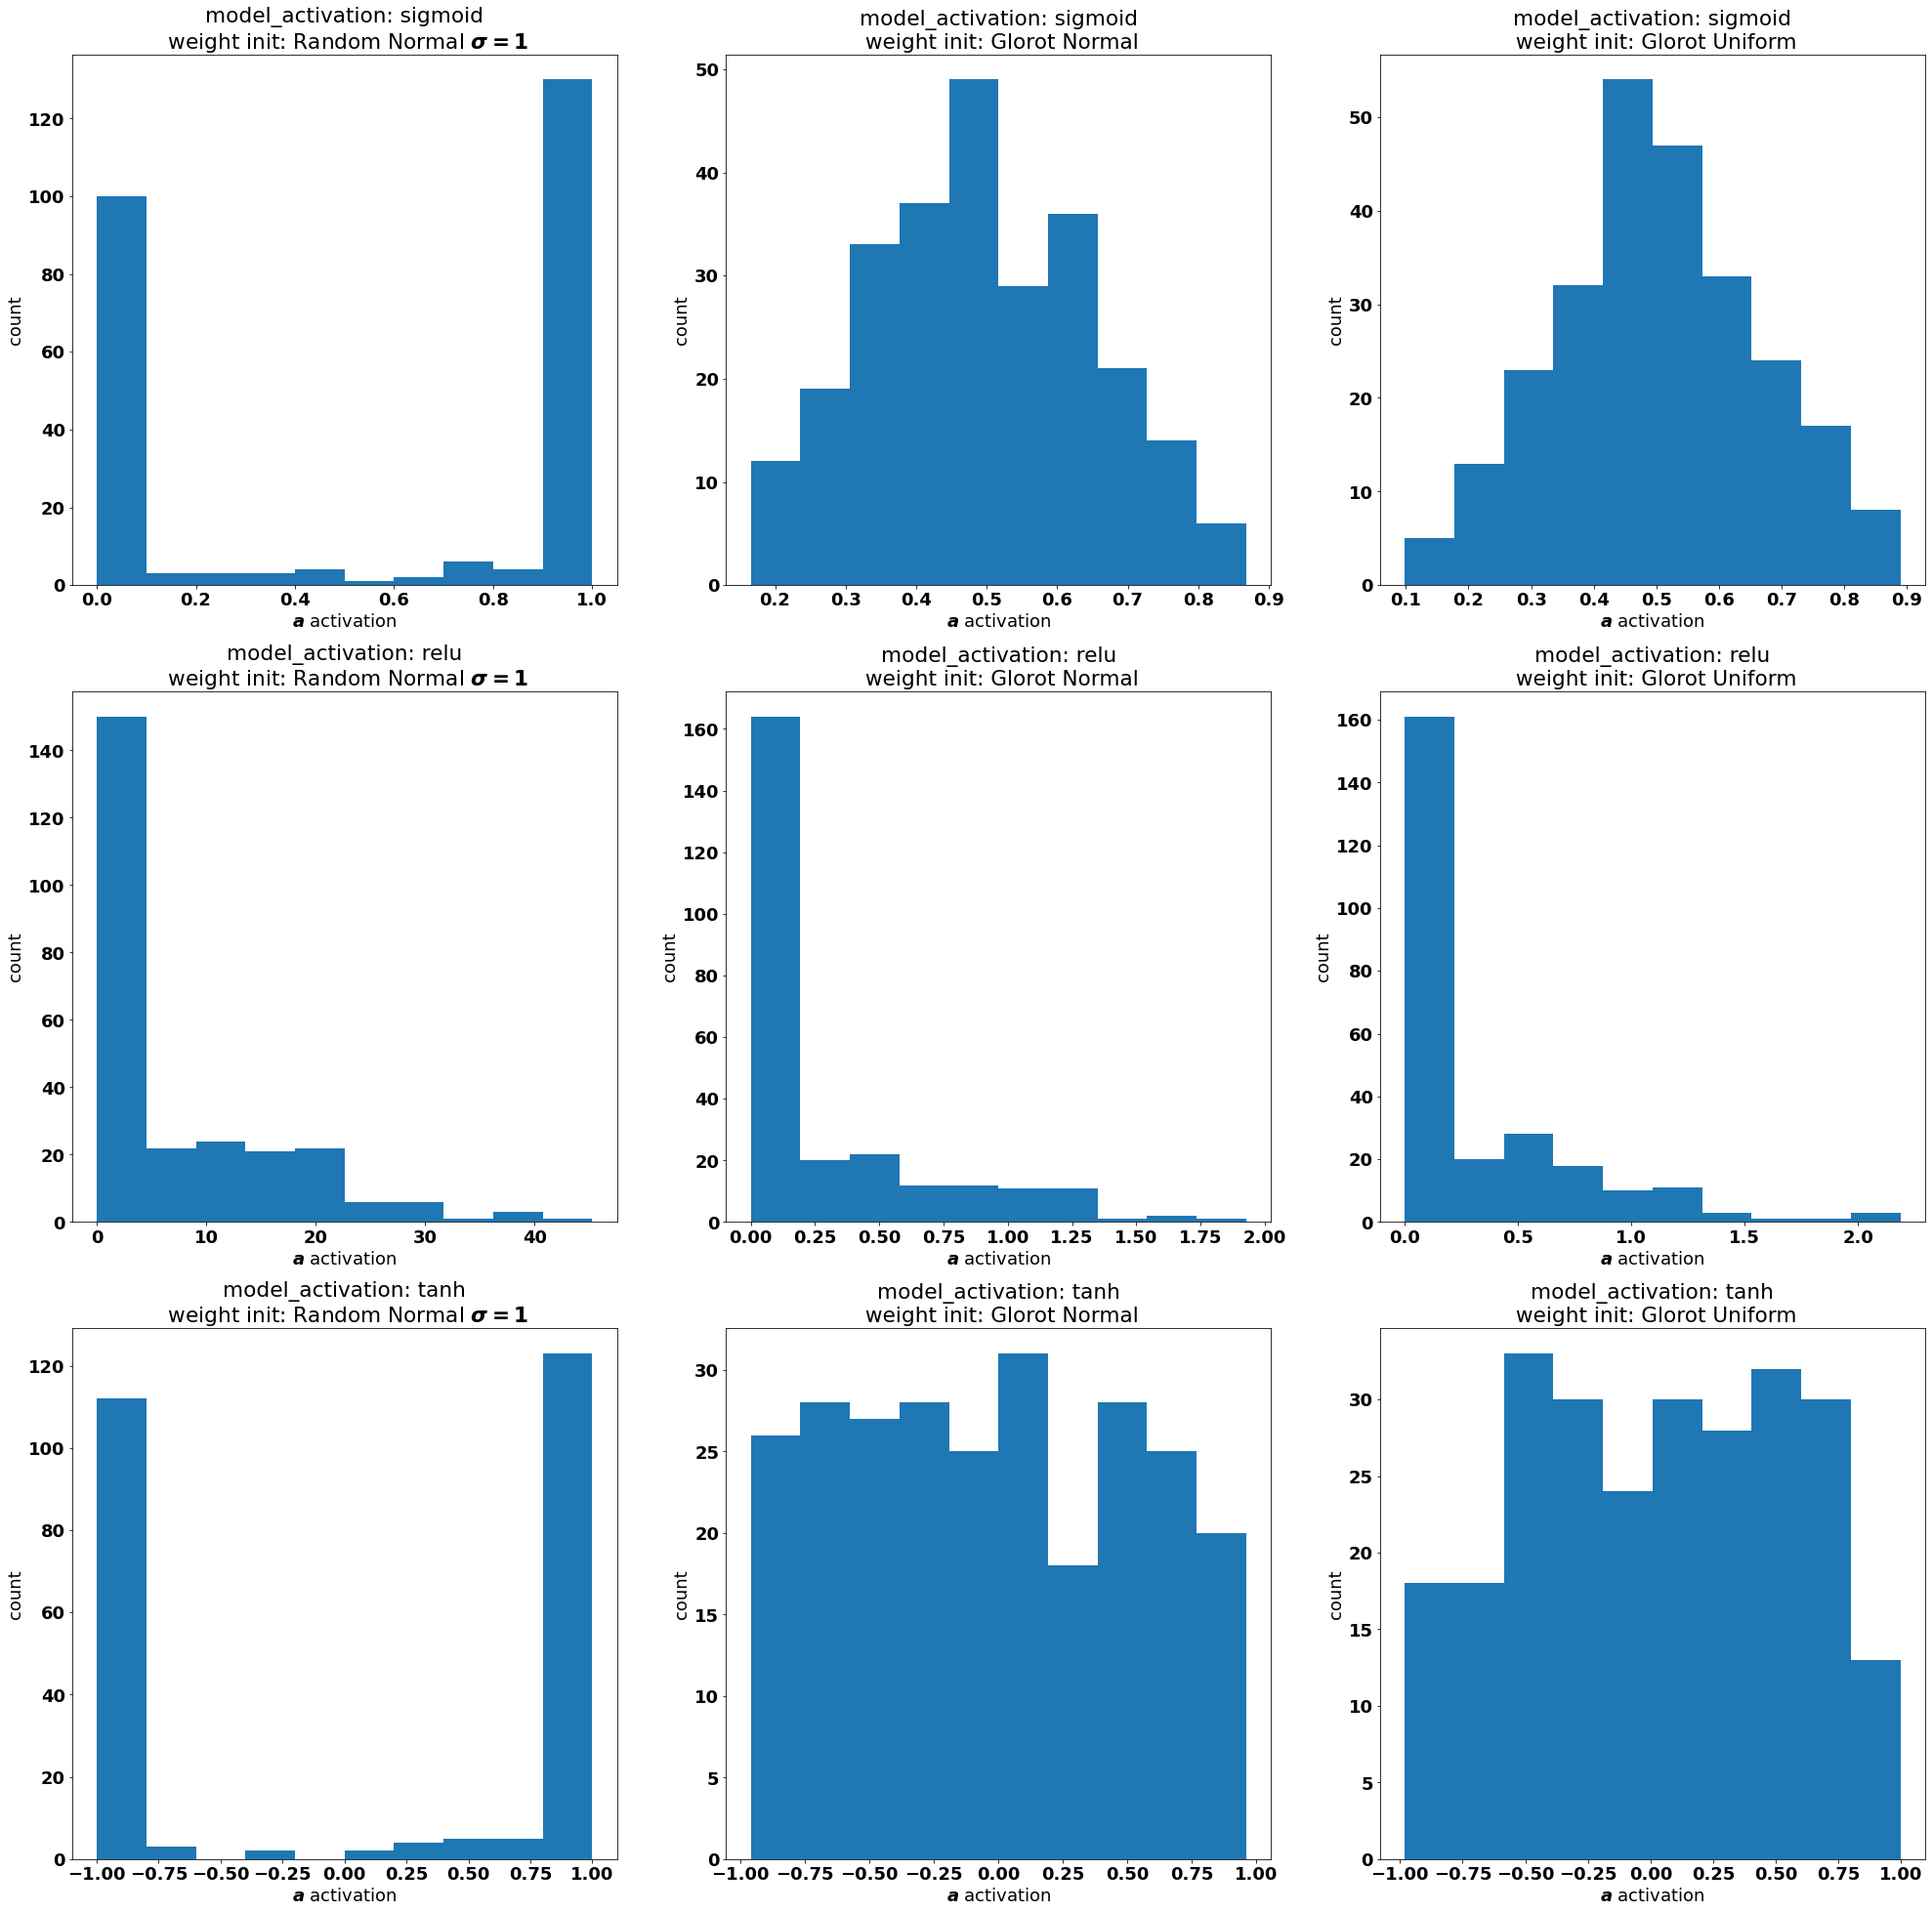

In [14]:
test_all(x)